In [68]:
#importing libraries
import pandas as pd
import numpy as np

## Importing Data

In [70]:
# Fetch data from api url. Choose the second way (Import data from local file) if waiting for too long
from G4_Functions import fetch_data

df = fetch_data('https://data.cityofnewyork.us/resource/k397-673e.json?$limit=5700000')
df.tail()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
5662708,2023,858,TECHNOLOGY & INNOVATION,ALLEN,FRANCIS,L,2017-09-18T00:00:00.000,MANHATTAN,CALL CENTER REPRESENTATIVE,ON LEAVE,41555.00,per Annum,420.00,11147.61,0.00,0.66,796.80
5662709,2023,858,TECHNOLOGY & INNOVATION,ALLEN,ROXANNA,NaN,2018-04-30T00:00:00.000,MANHATTAN,GRAPHIC ARTIST,ACTIVE,93908.00,per Annum,1820.00,94017.74,0.00,0.00,3725.93
5662710,2023,858,TECHNOLOGY & INNOVATION,ALLEYNE,CLAUDIA,G,2015-04-06T00:00:00.000,MANHATTAN,ASSOCIATE CALL CENTER REPRESENTATIVE-NON-SPVR,ACTIVE,56237.00,per Annum,1820.00,47663.49,0.00,0.68,1830.20
5662711,2023,858,TECHNOLOGY & INNOVATION,ALLMAN,DARRYL,NaN,2005-08-29T00:00:00.000,BROOKLYN,TELECOMMUNICATIONS ASSOCIATE,ACTIVE,74406.00,per Annum,1820.00,74471.35,14.00,774.15,9920.37
5662712,2023,858,TECHNOLOGY & INNOVATION,ALMANZAR,RENSO,NaN,2021-06-07T00:00:00.000,BROOKLYN,CYBER SECURITY ANALYST,ACTIVE,91224.00,per Annum,1470.00,72837.15,9.00,533.24,3000.00


In [71]:
# Import data from local csv file
from G4_Functions import import_csv

df = import_csv('Citywide_Payroll_Data.csv')
df.columns = ['fiscal_year', 'payroll_number', 'agency_name', 'last_name', 'first_name', 'mid_init', 'agency_start_date', 'work_location_borough', 'title_description',	
              'leave_status_as_of_june_30',	'base_salary', 'pay_basis', 'regular_hours', 'regular_gross_paid', 'ot_hours', 'total_ot_paid',	'total_other_pay']
df.tail()

c:\Users\shell\Desktop\NEU\PJM\ALY 6140 Python\Python GA\files for submit\G4_Functions.py:34: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath_or_buffer=file_path, header=0, thousands=',')


,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
5662708,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,JUAN,NaN,10/02/2017,QUEENS,PAINTER,ACTIVE,315.07,per Day,1820.0,81918.20,1149.00,77575.47,3752.01
5662709,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,LUIS,NaN,08/21/2017,BRONX,PAINTER,ACTIVE,315.07,per Day,1820.0,81918.20,1037.75,70063.81,3206.96
5662710,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA,PAUL,E,10/07/2019,QUEENS,SUPERVISOR PAINTER,ACTIVE,360.08,per Day,1820.0,93620.80,908.00,70035.56,617.28
5662711,2023,996.0,NYC HOUSING AUTHORITY,ZUNIGA BERMEO,HUGO,E,07/06/2022,QUEENS,PAINTER,ACTIVE,315.07,per Day,1771.0,79082.62,1005.75,67869.89,0.00
5662712,2023,996.0,NYC HOUSING AUTHORITY,ZURITA,MARK,NaN,06/10/1985,BRONX,HOUSING MANAGER,ACTIVE,95934.00,per Annum,1820.0,95671.16,0.00,0.00,1335.36


## Exploratory Data Analysis

In [72]:
# Check data types
df.dtypes

fiscal_year                     int64
payroll_number                float64
agency_name                    object
last_name                      object
first_name                     object
mid_init                       object
agency_start_date              object
work_location_borough          object
title_description              object
leave_status_as_of_june_30     object
base_salary                   float64
pay_basis                      object
regular_hours                 float64
regular_gross_paid            float64
ot_hours                      float64
total_ot_paid                 float64
total_other_pay               float64
dtype: object

In [73]:
# Number of Rows
num_rows = df.count()
print("Number of Rows:", num_rows)

# Number of Columns
num_columns = len(df.columns)
print("Number of Columns:", num_columns)

Number of Rows: fiscal_year                   5662713
payroll_number                3917273
agency_name                   5662713
last_name                     5649521
first_name                    5649468
mid_init                      3338152
agency_start_date             5662650
work_location_borough         5156480
title_description             5662617
leave_status_as_of_june_30    5662713
base_salary                   5662713
pay_basis                     5662713
regular_hours                 5662713
regular_gross_paid            5662713
ot_hours                      5662713
total_ot_paid                 5662713
total_other_pay               5662713
dtype: int64
Number of Columns: 17


In [74]:
# Description table for the whole dataset
include = ['object', 'float', 'int']
df.describe(include=include)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
count,5.662713e+06,3.917273e+06,5662713,5649521,5649468,3338152,5662650,5156480,5662617,5662713,5.662713e+06,5662713,5.662713e+06,5.662713e+06,5.662713e+06,5.662713e+06,5.662713e+06
unique,NaN,NaN,167,178170,102580,45,15968,22,1933,5,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,A,01/01/2010,MANHATTAN,TEACHER- PER SESSION,ACTIVE,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1099218,36334,85040,501121,106269,3663939,887850,4783700,NaN,3384422,NaN,NaN,NaN,NaN,NaN
mean,2.018580e+03,5.747730e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.502393e+04,NaN,6.588651e+02,4.293778e+04,6.392333e+01,3.457579e+03,3.056246e+03
std,2.848090e+00,3.014926e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.352534e+04,NaN,8.855384e+02,4.070520e+04,1.668632e+02,9.832350e+03,6.216894e+03
min,2.014000e+03,2.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-02,NaN,-1.872770e+03,-2.054519e+05,-2.090000e+02,-2.649388e+04,-2.815950e+05
25%,2.016000e+03,3.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,3.330690e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,7.420000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.307900e+04,NaN,0.000000e+00,3.594408e+04,0.000000e+00,0.000000e+00,5.690000e+01
75%,2.021000e+03,7.470000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.039300e+04,NaN,1.820000e+03,7.584755e+04,0.000000e+00,1.087500e+02,3.641650e+03


In [75]:
#Checking the null values as mean
df.isnull().mean()

fiscal_year                   0.000000
payroll_number                0.308234
agency_name                   0.000000
last_name                     0.002330
first_name                    0.002339
mid_init                      0.410503
agency_start_date             0.000011
work_location_borough         0.089398
title_description             0.000017
leave_status_as_of_june_30    0.000000
base_salary                   0.000000
pay_basis                     0.000000
regular_hours                 0.000000
regular_gross_paid            0.000000
ot_hours                      0.000000
total_ot_paid                 0.000000
total_other_pay               0.000000
dtype: float64

In [76]:
#Checking the null values as percentage
df.isnull().sum() * 100 / len(df)

fiscal_year                    0.000000
payroll_number                30.823388
agency_name                    0.000000
last_name                      0.232963
first_name                     0.233898
mid_init                      41.050306
agency_start_date              0.001113
work_location_borough          8.939761
title_description              0.001695
leave_status_as_of_june_30     0.000000
base_salary                    0.000000
pay_basis                      0.000000
regular_hours                  0.000000
regular_gross_paid             0.000000
ot_hours                       0.000000
total_ot_paid                  0.000000
total_other_pay                0.000000
dtype: float64

In [77]:
#count of occurance and percentage in each value in leave status
import pandas as pd

counts = df['leave_status_as_of_june_30'].value_counts()
percs = df['leave_status_as_of_june_30'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
leave_status_as_of_june_30,,
ACTIVE,4783700,84.5%
CEASED,756163,13.4%
ON LEAVE,65722,1.2%
SEASONAL,46844,0.8%
ON SEPARATION LEAVE,10284,0.2%


In [78]:
#count of occurance in each value in leave status
df['pay_basis'].value_counts()

pay_basis
per Annum          3384422
per Day            1289115
per Hour            964310
Prorated Annual      24866
Name: count, dtype: int64

# EDA - Visulization

In [79]:
import matplotlib.pyplot as plt
import seaborn as sbn

agency_name
DEPT OF ED PEDAGOGICAL            106882
DEPT OF ED PER SESSION TEACHER     82883
POLICE DEPARTMENT                  58617
DEPT OF ED PARA PROFESSIONALS      39580
BOARD OF ELECTION POLL WORKERS     29915
DEPT OF ED HRLY SUPPORT STAFF      26900
FIRE DEPARTMENT                    19072
DEPARTMENT OF EDUCATION ADMIN      17551
DEPT OF PARKS & RECREATION         16732
DEPT OF ED PER DIEM TEACHERS       15020
NYC HOUSING AUTHORITY              14672
HRA/DEPT OF SOCIAL SERVICES        13908
DEPARTMENT OF SANITATION           11429
DEPARTMENT OF CORRECTION           10359
ADMIN FOR CHILDREN'S SVCS           8860
DEPT OF HEALTH/MENTAL HYGIENE       8225
DEPT OF ENVIRONMENT PROTECTION      6971
DEPARTMENT OF TRANSPORTATION        6842
COMMUNITY COLLEGE (MANHATTAN)       4266
COMMUNITY COLLEGE (LAGUARDIA)       3264
HOUSING PRESERVATION & DVLPMNT      3113
DEPT OF CITYWIDE ADMIN SVCS         2708
COMMUNITY COLLEGE (KINGSBORO)       2650
COMMUNITY COLLEGE (QUEENSBORO)      2325
DIST

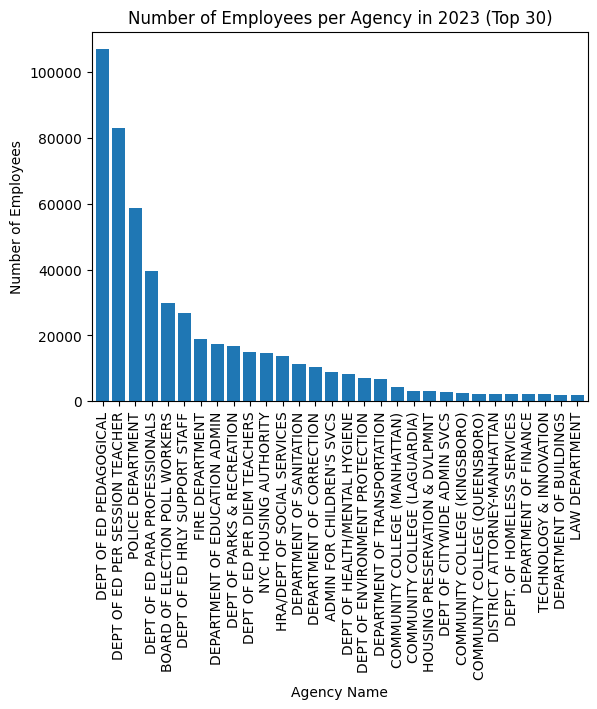

In [80]:
# Filter data for 2023
import matplotlib.pyplot as plt

df_2023 = df[df['fiscal_year'] == 2023]
# 'fiscal_year' is object if importing data from api_url
# df_2023 = df[df['fiscal_year'] == '2023']
df_2023

# Group by agency_name and count
agency_counts = df_2023['agency_name'].value_counts().nlargest(30)
print(agency_counts)

# Create bar chart
agency_counts.plot(kind='bar', width=0.8)
plt.xlabel('Agency Name')
plt.ylabel('Number of Employees')
plt.title('Number of Employees per Agency in 2023 (Top 30)')
plt.show()

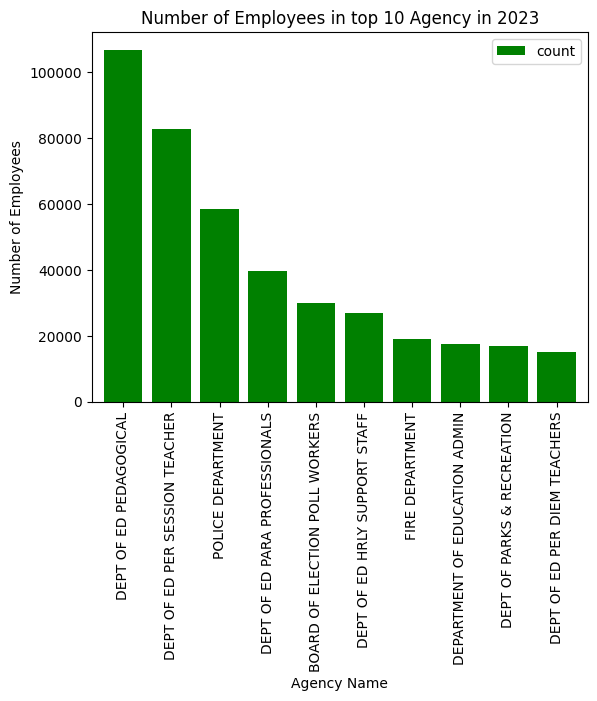

In [82]:
#top 10 agencies with number of employess in NYC
import pandas as pd
agency_counts = df_2023['agency_name'].value_counts().nlargest(10)
agency_counts_df = pd.DataFrame(agency_counts)

agency_counts_df.plot(kind='bar', width=0.8, color = 'Green')
plt.xlabel('Agency Name')
plt.ylabel('Number of Employees')
plt.title('Number of Employees in top 10 Agency in 2023')
plt.show()

work_location_borough
MANHATTAN    400043
QUEENS        61355
BROOKLYN      49996
BRONX         27298
RICHMOND       7894
Name: count, dtype: int64


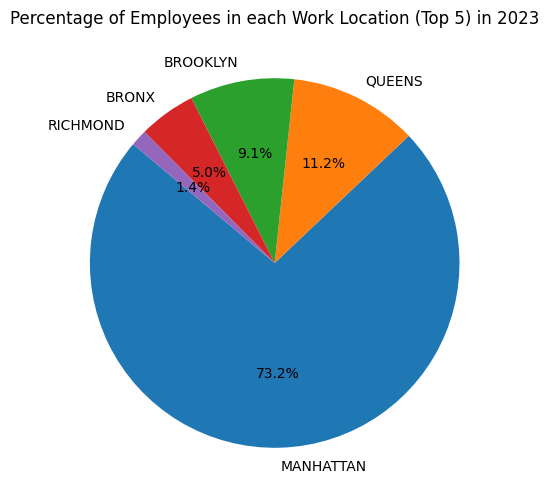

In [83]:
# Group by work location and count
work_location_counts = df_2023['work_location_borough'].value_counts().nlargest(5)
print(work_location_counts)

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(work_location_counts, labels=work_location_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Employees in each Work Location (Top 5) in 2023')

# Display the chart
plt.show()

In [84]:
#grouping the leave status with yearly
grouped_counts_df = df.groupby('fiscal_year')['leave_status_as_of_june_30'].value_counts().unstack().fillna(0).reset_index()
grouped_counts_df

leave_status_as_of_june_30,fiscal_year,ACTIVE,CEASED,ON LEAVE,ON SEPARATION LEAVE,SEASONAL
0,2014,454121,43638,5387,982,5397
1,2015,467773,96958,6333,1021,5795
2,2016,469903,64033,5959,955,3967
3,2017,494029,55830,5924,885,5598
4,2018,488506,46992,5772,860,4031
5,2019,498196,83606,6029,958,3642
6,2020,482955,94357,6997,880,5021
7,2021,473227,89281,5967,1108,3894
8,2022,485293,110725,10140,1617,5233
9,2023,469697,70743,7214,1018,4266


Text(0.5, 1.0, 'Leave status over the years from 2014-2023')

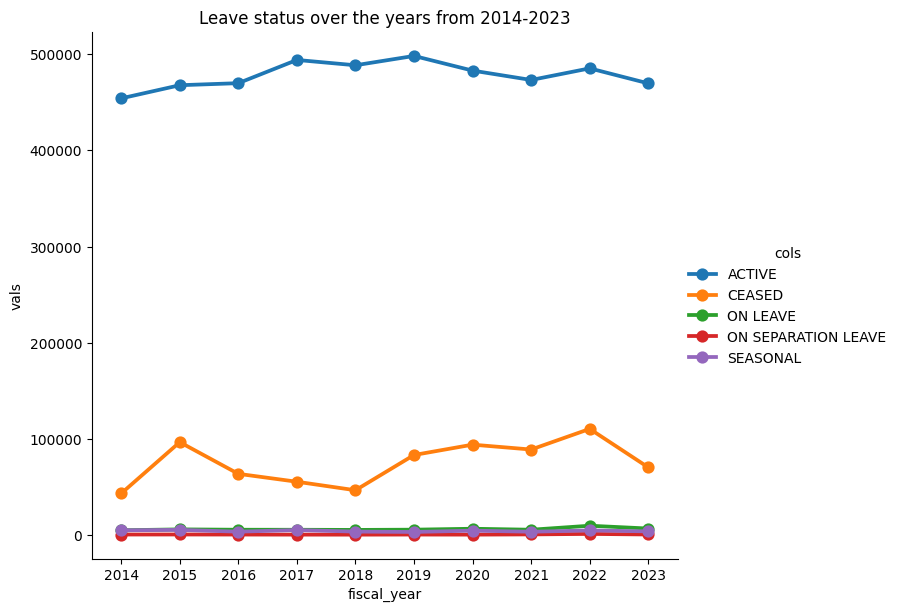

In [85]:
import seaborn as sbn
dfm = grouped_counts_df.melt('fiscal_year', var_name='cols', value_name='vals')
(dfm.head(10))
sbn.catplot(x="fiscal_year", y="vals", hue='cols', data=dfm, kind='point', height=6,aspect=1.2,)
plt.title("Leave status over the years from 2014-2023")
#sbn.swarmplot(data=dfm, x="fiscal_year", y="vals",hue='cols')

In [86]:
# Selecting most populated two locations of NYC wehre there are highest
df_location = df[df['work_location_borough'].isin(['MANHATTAN','QUEENS'])]
#df_location.head()
agency_types= ['DEPT OF ED PEDAGOGICAL','DEPT OF ED PER SESSION TEACHER',
                'POLICE DEPARTMENT','DEPT OF ED PARA PROFESSIONALS',
                'BOARD OF ELECTION POLL WORKERS',
                'DEPT OF ED HRLY SUPPORT STAFF','FIRE DEPARTMENT',
                'DEPARTMENT OF EDUCATION ADMIN','DEPT OF PARKS & RECREATION',
                'DEPT OF ED PER DIEM TEACHERS']
top10_agency_2023 = df_location[df_location['agency_name'].isin(agency_types)]
top10_agency_2023.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2049,2022,742.0,DEPT OF ED PEDAGOGICAL,ANTHONY TIDD,SHARON,B,09/06/1988,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.0,per Annum,0.0,0.00,0.0,0.0,8258.87
2530,2022,742.0,DEPT OF ED PEDAGOGICAL,APPELMAN,BROOKE,A,10/20/2015,MANHATTAN,TEACHER,ACTIVE,97469.0,per Annum,0.0,90693.25,0.0,0.0,1486.01
3162,2022,742.0,DEPT OF ED PEDAGOGICAL,ARBOLINO,ARIANA,M,09/05/2000,MANHATTAN,PRINCIPAL,ACTIVE,169456.0,per Annum,0.0,168222.06,0.0,0.0,16947.18
3501,2022,742.0,DEPT OF ED PEDAGOGICAL,ARBUS,LISA,M,10/18/2000,MANHATTAN,TEACHER,CEASED,92906.0,per Annum,0.0,0.00,0.0,0.0,4426.47
3611,2022,742.0,DEPT OF ED PEDAGOGICAL,ARCIERO,DENISE,A,08/30/2007,MANHATTAN,TEACHER,ACTIVE,100351.0,per Annum,0.0,100350.96,0.0,0.0,4851.73


In [87]:
include = ['object', 'float', 'int']
top10_agency_2023.describe(include=include)

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
count,3.313167e+06,2.267872e+06,3313167,3303614,3303605,1949617,3313167,3313167,3313138,3313167,3.313167e+06,3313167,3.313167e+06,3.313167e+06,3.313167e+06,3.313167e+06,3.313167e+06
unique,NaN,NaN,10,129787,73209,40,13666,2,674,5,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,DEPT OF ED PEDAGOGICAL,RODRIGUEZ,MICHAEL,M,01/01/2010,MANHATTAN,TEACHER- PER SESSION,ACTIVE,NaN,per Annum,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,886126,21808,40318,303057,88975,3121251,813243,2858490,NaN,1658638,NaN,NaN,NaN,NaN,NaN
mean,2.019104e+03,6.235189e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.871164e+04,NaN,2.778260e+02,3.691125e+04,3.134693e+01,1.798145e+03,2.346174e+03
std,2.578216e+00,2.455951e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.408719e+04,NaN,6.693689e+02,4.078901e+04,1.182059e+02,7.148833e+03,5.585875e+03
min,2.015000e+03,5.600000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,-1.523200e+03,-2.054519e+05,-9.675000e+01,-2.649388e+04,-2.815950e+05
25%,2.017000e+03,7.420000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.318000e+01,NaN,0.000000e+00,1.202935e+03,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.019000e+03,7.420000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.592700e+04,NaN,0.000000e+00,1.934420e+04,0.000000e+00,0.000000e+00,4.000000e-01
75%,2.021000e+03,7.470000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.882200e+04,NaN,0.000000e+00,7.019538e+04,0.000000e+00,0.000000e+00,1.380040e+03


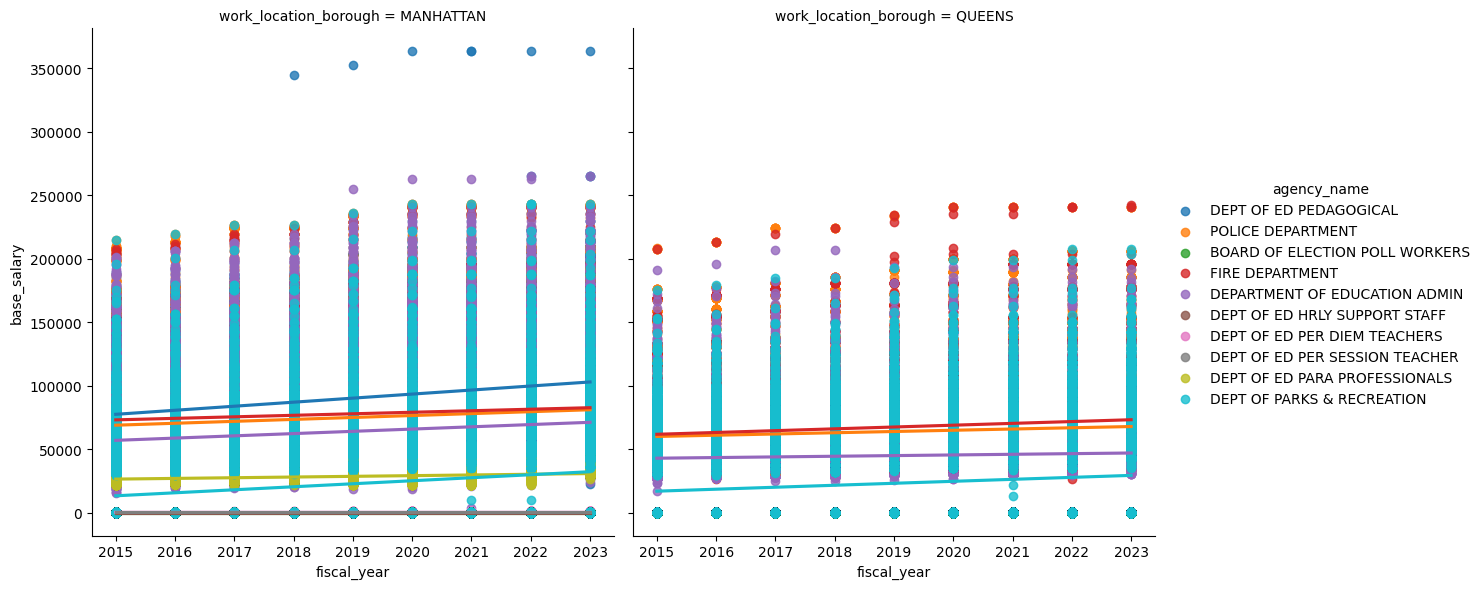

In [88]:
#Graphical presentation of the number of employees over the years at both locations
#hue="agency_name"
sbn.lmplot(data=top10_agency_2023, x="fiscal_year", y="base_salary", hue="agency_name",
           col="work_location_borough", height=6)

In [89]:
# Group by work location and count
work_location_counts = top10_agency_2023['work_location_borough'].value_counts()
print(work_location_counts)

work_location_borough
MANHATTAN    3121251
QUEENS        191916
Name: count, dtype: int64


In [90]:
# Group by leave status and count
leave_status_counts = top10_agency_2023['leave_status_as_of_june_30'].value_counts()
print(leave_status_counts)

leave_status_as_of_june_30
ACTIVE                 2858490
CEASED                  413715
ON LEAVE                 35856
SEASONAL                  3631
ON SEPARATION LEAVE       1475
Name: count, dtype: int64


## Filter data for Tech department

In [92]:
# Filter data for Tech agency
df_tech = df[df['agency_name'].isin(['TECHNOLOGY & INNOVATION', 'DEPT OF INFO TECH & TELECOMM'])]
df_tech.head()

,fiscal_year,payroll_number,agency_name,last_name,first_name,mid_init,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
523303,2020,858.0,DEPT OF INFO TECH & TELECOMM,FARMER,JOHN,P,06/03/2019,MANHATTAN,TELECOMMUNICATION MANAGER,ACTIVE,236900.0,per Annum,1820.0,233300.38,0.0,0.0,0.0
523304,2020,858.0,DEPT OF INFO TECH & TELECOMM,HINES,EVAN,M,05/24/2010,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,234199.0,per Annum,1820.0,230640.52,0.0,0.0,0.0
523305,2020,858.0,DEPT OF INFO TECH & TELECOMM,BIMONTE,MICHAEL,NaN,06/10/2003,BROOKLYN,COMPUTER SYSTEMS MANAGER,ACTIVE,233094.0,per Annum,1820.0,229552.23,0.0,0.0,0.0
523306,2020,858.0,DEPT OF INFO TECH & TELECOMM,SUNDERLAND,DONALD,N,07/02/2012,BROOKLYN,COMPUTER SYSTEMS MANAGER,ACTIVE,233094.0,per Annum,1820.0,229552.23,0.0,0.0,0.0
523307,2020,858.0,DEPT OF INFO TECH & TELECOMM,BROWN,GEOFFREY,S,04/04/2016,MANHATTAN,COMPUTER SYSTEMS MANAGER,ACTIVE,232358.0,per Annum,1820.0,228827.32,0.0,0.0,0.0


In [93]:
# df_tech describe
df_tech.describe()

,fiscal_year,payroll_number,base_salary,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
count,18157.000000,13019.0,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000,18157.000000
mean,2018.796442,858.0,84662.925883,1446.154875,71413.672949,15.117706,804.694725,2326.347582
std,2.843320,0.0,43682.918838,627.137503,47686.521787,48.532945,3032.435908,4193.395462
min,2014.000000,858.0,10.000000,-235.250000,-91623.640000,-9.000000,-233.960000,-77319.900000
25%,2016.000000,858.0,45000.000000,1226.750000,35325.390000,0.000000,0.000000,0.000000
50%,2019.000000,858.0,82000.000000,1820.000000,67911.080000,0.000000,0.000000,501.530000
75%,2021.000000,858.0,115225.000000,1825.000000,108050.440000,0.000000,29.100000,3792.370000
max,2023.000000,858.0,247577.000000,1890.000000,246898.610000,1201.000000,62014.450000,103870.170000


In [94]:
# Group by work location and count
work_location_counts = df_tech['work_location_borough'].value_counts()
print(work_location_counts)

# Group by leave status and count
leave_status_counts = df_tech['leave_status_as_of_june_30'].value_counts()
print(leave_status_counts)

work_location_borough
BROOKLYN         8830
MANHATTAN        7954
BRONX              10
WASHINGTON DC       4
Name: count, dtype: int64
leave_status_as_of_june_30
ACTIVE                 14721
CEASED                  3080
ON LEAVE                 282
ON SEPARATION LEAVE       74
Name: count, dtype: int64


# Data cleaning for tech subset:

In [95]:
# Handle missing value in work_location_borough (50% as 'MANHATTAN' and another 50% as 'BROOKLYN')
import numpy as np

# Find indices of missing values
missing_indices = df_tech[df_tech['work_location_borough'].isnull()].index

# Randomly select half of these indices
half_missing_indices = np.random.choice(missing_indices, size=len(missing_indices) // 2, replace=False)

# Impute 'BROOKLYN' to the selected half
df_tech.loc[half_missing_indices, 'work_location_borough'] = 'BROOKLYN'

# Impute 'MANHATTAN' to the remaining half
df_tech.loc[missing_indices.difference(half_missing_indices), 'work_location_borough'] = 'MANHATTAN'

In [96]:
# Correct the data types for all columns
import pandas as pd

# Convert Date Columns:
df_tech['agency_start_date'] = pd.to_datetime(df_tech['agency_start_date'])

# Convert Numeric Columns:
numeric_cols = ['base_salary', 'regular_hours', 'regular_gross_paid', 'ot_hours', 'total_ot_paid', 'total_other_pay']
for col in numeric_cols:
    df_tech[col] = pd.to_numeric(df_tech[col], errors='coerce')


C:\Users\shell\AppData\Local\Temp\ipykernel_9568\3297492790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['agency_start_date'] = pd.to_datetime(df_tech['agency_start_date'])
C:\Users\shell\AppData\Local\Temp\ipykernel_9568\3297492790.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech[col] = pd.to_numeric(df_tech[col], errors='coerce')


In [97]:
# clean abnormal data in the regular_hours column (0 and negative values) by replacing them with the average of the other values
# Calculate the average, excluding 0 and negative values
avg_hours = round(df_tech[df_tech['regular_hours'] > 0]['regular_hours'].mean(), 0)
print(avg_hours)

# Replace 0 and negative values with the average
df_tech.loc[df_tech['regular_hours'] <= 0, 'regular_hours'] = avg_hours

1529.0


In [98]:
# Standardize the base salary (create two new columns: base_salary_hourly and a base_salary_annual )
# Initialize new columns
df_tech['base_salary_hourly'] = None
df_tech['base_salary_annual'] = None

# Assign values based on pay basis
df_tech.loc[df_tech['pay_basis'] == 'per Hour', 'base_salary_hourly'] = df_tech['base_salary']
df_tech.loc[df_tech['pay_basis'] == 'per Annum', 'base_salary_annual'] = df_tech['base_salary']

# Calculate base_salary_hourly for annual pay rows
df_tech.loc[df_tech['pay_basis'] == 'per Annum', 'base_salary_hourly'] = df_tech['base_salary'] / df_tech['regular_hours']

# Calculate base_salary_annual for hourly pay rows
df_tech.loc[df_tech['pay_basis'] == 'per Hour', 'base_salary_annual'] = df_tech['base_salary'] * df_tech['regular_hours']

C:\Users\shell\AppData\Local\Temp\ipykernel_9568\24900284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['base_salary_hourly'] = None
C:\Users\shell\AppData\Local\Temp\ipykernel_9568\24900284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['base_salary_annual'] = None


In [99]:
# Create three new variable
# Total Salary (base_salary_annual + total_ot_paid + total_other_pay):
df_tech['total_salary'] = df_tech['base_salary_annual'] + df_tech['total_ot_paid'] + df_tech['total_other_pay']

# Work Year (calculate from agency_start_date to fiscal year):
# Convert fiscal_year to the end date of that fiscal year (assuming fiscal year end on Dec 31)
df_tech['fiscal_year_end'] = pd.to_datetime(df_tech['fiscal_year'].astype(str) + '-12-31')

# Calculate work_year
df_tech['work_year'] = round((df_tech['fiscal_year_end'] - df_tech['agency_start_date']).dt.days / 365.25, 1)

# Job Type (search keywords from title_description column):
# Use the categorize_job_type function from .py file:
from G4_Functions import categorize_job_type

keywords = ['MANAGER', 'INTERN', 'ENGINEER', 'ANALYST', 'COUNSEL']
df_tech['job_type'] = categorize_job_type(df_tech, 'title_description', keywords)

# Group by job type and count
job_type_counts = df_tech['job_type'].value_counts()
print(job_type_counts)

job_type
OTHER       12313
MANAGER      3725
ANALYST      1549
INTERN        358
COUNSEL       145
ENGINEER       67
Name: count, dtype: int64


C:\Users\shell\AppData\Local\Temp\ipykernel_9568\490418199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['total_salary'] = df_tech['base_salary_annual'] + df_tech['total_ot_paid'] + df_tech['total_other_pay']
C:\Users\shell\AppData\Local\Temp\ipykernel_9568\490418199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tech['fiscal_year_end'] = pd.to_datetime(df_tech['fiscal_year'].astype(str) + '-12-31')
C:\Users\shell\AppData\Local\Temp\ipykernel_9568\490418199.py:10: SettingWithCopyWarnin

## Data Cleaning for Top 10 agency subset

In [100]:
numeric_cols = ['regular_hours', 'regular_gross_paid','ot_hours', 'total_ot_paid', 'total_other_pay']
for col in numeric_cols:
    top10_agency_2023[col] = pd.to_numeric(top10_agency_2023[col], errors='coerce')
print(top10_agency_2023.dtypes)

fiscal_year                     int64
payroll_number                float64
agency_name                    object
last_name                      object
first_name                     object
mid_init                       object
agency_start_date              object
work_location_borough          object
title_description              object
leave_status_as_of_june_30     object
base_salary                   float64
pay_basis                      object
regular_hours                 float64
regular_gross_paid            float64
ot_hours                      float64
total_ot_paid                 float64
total_other_pay               float64
dtype: object


C:\Users\shell\AppData\Local\Temp\ipykernel_9568\3572327422.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_agency_2023[col] = pd.to_numeric(top10_agency_2023[col], errors='coerce')


In [101]:
#finding percentage of missing values for top10_agency_2023 data
top10_agency_2023.isnull().mean()

fiscal_year                   0.000000
payroll_number                0.315497
agency_name                   0.000000
last_name                     0.002883
first_name                    0.002886
mid_init                      0.411555
agency_start_date             0.000000
work_location_borough         0.000000
title_description             0.000009
leave_status_as_of_june_30    0.000000
base_salary                   0.000000
pay_basis                     0.000000
regular_hours                 0.000000
regular_gross_paid            0.000000
ot_hours                      0.000000
total_ot_paid                 0.000000
total_other_pay               0.000000
dtype: float64

In [102]:
top10_agency_2023.dtypes

fiscal_year                     int64
payroll_number                float64
agency_name                    object
last_name                      object
first_name                     object
mid_init                       object
agency_start_date              object
work_location_borough          object
title_description              object
leave_status_as_of_june_30     object
base_salary                   float64
pay_basis                      object
regular_hours                 float64
regular_gross_paid            float64
ot_hours                      float64
total_ot_paid                 float64
total_other_pay               float64
dtype: object

In [103]:
#dropping the columns
columns_to_drop = ['last_name','first_name','mid_init']
df_top10 = top10_agency_2023.drop(columns=columns_to_drop)
df_top10

,fiscal_year,payroll_number,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay
2049,2022,742.0,DEPT OF ED PEDAGOGICAL,09/06/1988,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.00,per Annum,0.00,0.00,0.00,0.00,8258.87
2530,2022,742.0,DEPT OF ED PEDAGOGICAL,10/20/2015,MANHATTAN,TEACHER,ACTIVE,97469.00,per Annum,0.00,90693.25,0.00,0.00,1486.01
3162,2022,742.0,DEPT OF ED PEDAGOGICAL,09/05/2000,MANHATTAN,PRINCIPAL,ACTIVE,169456.00,per Annum,0.00,168222.06,0.00,0.00,16947.18
3501,2022,742.0,DEPT OF ED PEDAGOGICAL,10/18/2000,MANHATTAN,TEACHER,CEASED,92906.00,per Annum,0.00,0.00,0.00,0.00,4426.47
3611,2022,742.0,DEPT OF ED PEDAGOGICAL,08/30/2007,MANHATTAN,TEACHER,ACTIVE,100351.00,per Annum,0.00,100350.96,0.00,0.00,4851.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633967,2023,846.0,DEPT OF PARKS & RECREATION,11/05/2018,MANHATTAN,AGENCY ATTORNEY,ACTIVE,95000.00,per Annum,1820.00,86352.38,0.00,0.00,3762.50
5633970,2023,846.0,DEPT OF PARKS & RECREATION,07/13/1998,QUEENS,PARK SUPERVISOR,ACTIVE,82835.00,per Annum,2080.00,82934.63,405.25,25520.37,24728.30
5633972,2023,846.0,DEPT OF PARKS & RECREATION,05/19/2016,QUEENS,LANDSCAPE ARCHITECT,ACTIVE,85194.00,per Annum,1680.00,80810.81,0.00,0.00,5657.94
5633973,2023,846.0,DEPT OF PARKS & RECREATION,03/25/2022,QUEENS,JOB TRAINING PARTICIPANT,CEASED,16.39,per Hour,1079.75,17908.94,0.00,0.00,0.00


In [104]:
df_top10['agency_start_date'] = pd.to_datetime(df_top10['agency_start_date'], errors='coerce')
# Extract year, month, and day into separate columns
df_top10['agency_start_month'] = df_top10['agency_start_date'].dt.month
df_top10['agency_start_day'] = df_top10['agency_start_date'].dt.day
df_top10['agency_start_year'] = df_top10['agency_start_date'].dt.year
df_top10

,fiscal_year,payroll_number,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,agency_start_month,agency_start_day,agency_start_year
2049,2022,742.0,DEPT OF ED PEDAGOGICAL,1988-09-06,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.00,per Annum,0.00,0.00,0.00,0.00,8258.87,9.0,6.0,1988.0
2530,2022,742.0,DEPT OF ED PEDAGOGICAL,2015-10-20,MANHATTAN,TEACHER,ACTIVE,97469.00,per Annum,0.00,90693.25,0.00,0.00,1486.01,10.0,20.0,2015.0
3162,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-09-05,MANHATTAN,PRINCIPAL,ACTIVE,169456.00,per Annum,0.00,168222.06,0.00,0.00,16947.18,9.0,5.0,2000.0
3501,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-10-18,MANHATTAN,TEACHER,CEASED,92906.00,per Annum,0.00,0.00,0.00,0.00,4426.47,10.0,18.0,2000.0
3611,2022,742.0,DEPT OF ED PEDAGOGICAL,2007-08-30,MANHATTAN,TEACHER,ACTIVE,100351.00,per Annum,0.00,100350.96,0.00,0.00,4851.73,8.0,30.0,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633967,2023,846.0,DEPT OF PARKS & RECREATION,2018-11-05,MANHATTAN,AGENCY ATTORNEY,ACTIVE,95000.00,per Annum,1820.00,86352.38,0.00,0.00,3762.50,11.0,5.0,2018.0
5633970,2023,846.0,DEPT OF PARKS & RECREATION,1998-07-13,QUEENS,PARK SUPERVISOR,ACTIVE,82835.00,per Annum,2080.00,82934.63,405.25,25520.37,24728.30,7.0,13.0,1998.0
5633972,2023,846.0,DEPT OF PARKS & RECREATION,2016-05-19,QUEENS,LANDSCAPE ARCHITECT,ACTIVE,85194.00,per Annum,1680.00,80810.81,0.00,0.00,5657.94,5.0,19.0,2016.0
5633973,2023,846.0,DEPT OF PARKS & RECREATION,2022-03-25,QUEENS,JOB TRAINING PARTICIPANT,CEASED,16.39,per Hour,1079.75,17908.94,0.00,0.00,0.00,3.0,25.0,2022.0


In [105]:
#uniques values
for i in df_top10.columns:
    print(i,'\n',df_top10[i].unique(),'\n')

fiscal_year 
 [2022 2020 2021 2015 2016 2017 2018 2019 2023] 

payroll_number 
 [742.  56. 300.  57. 740. 745. 746. 747. 744.  nan 846.] 

agency_name 
 ['DEPT OF ED PEDAGOGICAL' 'POLICE DEPARTMENT'
 'BOARD OF ELECTION POLL WORKERS' 'FIRE DEPARTMENT'
 'DEPARTMENT OF EDUCATION ADMIN' 'DEPT OF ED HRLY SUPPORT STAFF'
 'DEPT OF ED PER DIEM TEACHERS' 'DEPT OF ED PER SESSION TEACHER'
 'DEPT OF ED PARA PROFESSIONALS' 'DEPT OF PARKS & RECREATION'] 

agency_start_date 
 <DatetimeArray>
['1988-09-06 00:00:00', '2015-10-20 00:00:00', '2000-09-05 00:00:00',
 '2000-10-18 00:00:00', '2007-08-30 00:00:00', '2022-02-02 00:00:00',
 '2005-09-06 00:00:00', '1998-12-20 00:00:00', '2016-04-25 00:00:00',
 '1995-04-30 00:00:00',
 ...
 '2022-07-16 00:00:00', '2023-05-28 00:00:00', '2020-06-12 00:00:00',
 '2023-06-26 00:00:00', '2023-05-29 00:00:00', '2022-09-05 00:00:00',
 '2009-07-24 00:00:00', '2023-06-22 00:00:00', '2023-06-08 00:00:00',
 '2023-06-13 00:00:00']
Length: 13666, dtype: datetime64[ns] 

work_l

In [107]:
#creating new columns
df_top10['base_salary_hourly'] = None
df_top10['base_salary_annual'] = None


# Assign values based on pay basis
df_top10.loc[df_top10['pay_basis'] == 'per Hour', 'base_salary_hourly'] = df_top10['base_salary']
df_top10.loc[df_top10['pay_basis'] == 'per Annum', 'base_salary_annual'] = df_top10['base_salary']
df_top10.loc[df_top10['pay_basis'] == 'per Day','base_salary_annual'] = df_top10['base_salary']

# Calculate base_salary_hourly for annual pay rows
df_top10.loc[df_top10['pay_basis'] == 'per Annum', 'base_salary_hourly'] = df_top10['base_salary'] / df_top10['regular_hours']

# Calculate base_salary_annual for hourly pay rows
df_top10.loc[df_top10['pay_basis'] == 'per Hour', 'base_salary_annual'] = df_top10['base_salary'] * df_top10['regular_hours']

#
df_top10.loc[df_top10['pay_basis'] == 'per Day', 'base_salary_annual'] = df_top10['base_salary'] / (df_top10['regular_hours']/365) * df_top10['regular_hours']



df_top10.head(20)

,fiscal_year,payroll_number,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,regular_gross_paid,ot_hours,total_ot_paid,total_other_pay,agency_start_month,agency_start_day,agency_start_year,base_salary_hourly,base_salary_annual
2049,2022,742.0,DEPT OF ED PEDAGOGICAL,1988-09-06,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.00,per Annum,0.00,0.00,0.00,0.00,8258.87,9.0,6.0,1988.0,inf,128409.0
2530,2022,742.0,DEPT OF ED PEDAGOGICAL,2015-10-20,MANHATTAN,TEACHER,ACTIVE,97469.00,per Annum,0.00,90693.25,0.00,0.00,1486.01,10.0,20.0,2015.0,inf,97469.0
3162,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-09-05,MANHATTAN,PRINCIPAL,ACTIVE,169456.00,per Annum,0.00,168222.06,0.00,0.00,16947.18,9.0,5.0,2000.0,inf,169456.0
3501,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-10-18,MANHATTAN,TEACHER,CEASED,92906.00,per Annum,0.00,0.00,0.00,0.00,4426.47,10.0,18.0,2000.0,inf,92906.0
3611,2022,742.0,DEPT OF ED PEDAGOGICAL,2007-08-30,MANHATTAN,TEACHER,ACTIVE,100351.00,per Annum,0.00,100350.96,0.00,0.00,4851.73,8.0,30.0,2007.0,inf,100351.0
4296,2022,742.0,DEPT OF ED PEDAGOGICAL,2022-02-02,MANHATTAN,TEACHER,ACTIVE,69866.00,per Annum,0.00,26274.50,0.00,0.00,2801.02,2.0,2.0,2022.0,inf,69866.0
4623,2022,742.0,DEPT OF ED PEDAGOGICAL,2005-09-06,MANHATTAN,TEACHER,ACTIVE,109852.00,per Annum,0.00,104620.70,0.00,0.00,18903.82,9.0,6.0,2005.0,inf,109852.0
4789,2020,56.0,POLICE DEPARTMENT,1998-12-20,MANHATTAN,SUPERVISOR OF SCHOOL SECURITY,CEASED,57813.00,per Annum,0.00,0.00,0.00,0.00,650000.00,12.0,20.0,1998.0,inf,57813.0
4790,2020,56.0,POLICE DEPARTMENT,2016-04-25,MANHATTAN,STATIONARY ENGINEER,ACTIVE,508.80,per Day,2080.00,140146.17,1125.25,117728.07,40696.41,4.0,25.0,2016.0,None,185712.0
4791,2020,56.0,POLICE DEPARTMENT,1995-04-30,MANHATTAN,LIEUTENANT D/A SPECIAL ASSIGNMENT,CEASED,141196.00,per Annum,665.18,48008.86,2451.57,162000.47,78132.88,4.0,30.0,1995.0,212.267356,141196.0


In [108]:
df_top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3313167 entries, 2049 to 5633974
Data columns (total 19 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   fiscal_year                 int64         
 1   payroll_number              float64       
 2   agency_name                 object        
 3   agency_start_date           datetime64[ns]
 4   work_location_borough       object        
 5   title_description           object        
 6   leave_status_as_of_june_30  object        
 7   base_salary                 float64       
 8   pay_basis                   object        
 9   regular_hours               float64       
 10  regular_gross_paid          float64       
 11  ot_hours                    float64       
 12  total_ot_paid               float64       
 13  total_other_pay             float64       
 14  agency_start_month          float64       
 15  agency_start_day            float64       
 16  agency_start_year   

In [109]:
df_top10['base_salary_hourly'] = df_top10['base_salary_hourly'].astype(float)
df_top10['base_salary_annual'] = df_top10['base_salary_annual'].astype(float)

In [110]:
# Total Salary (base_salary_annual + total_ot_paid + total_other_pay):
df_top10['total_salary'] = df_top10['base_salary_annual'] + df_top10['total_ot_paid'] + df_top10['total_other_pay']
df_top10.dtypes

fiscal_year                            int64
payroll_number                       float64
agency_name                           object
agency_start_date             datetime64[ns]
work_location_borough                 object
title_description                     object
leave_status_as_of_june_30            object
base_salary                          float64
pay_basis                             object
regular_hours                        float64
regular_gross_paid                   float64
ot_hours                             float64
total_ot_paid                        float64
total_other_pay                      float64
agency_start_month                   float64
agency_start_day                     float64
agency_start_year                    float64
base_salary_hourly                   float64
base_salary_annual                   float64
total_salary                         float64
dtype: object

In [111]:
df_top10.isnull().mean()

fiscal_year                   0.000000
payroll_number                0.315497
agency_name                   0.000000
agency_start_date             0.000112
work_location_borough         0.000000
title_description             0.000009
leave_status_as_of_june_30    0.000000
base_salary                   0.000000
pay_basis                     0.000000
regular_hours                 0.000000
regular_gross_paid            0.000000
ot_hours                      0.000000
total_ot_paid                 0.000000
total_other_pay               0.000000
agency_start_month            0.000112
agency_start_day              0.000112
agency_start_year             0.000112
base_salary_hourly            0.317536
base_salary_annual            0.314477
total_salary                  0.314477
dtype: float64

In [112]:
df_top10['agency_start_date'] = df_top10['agency_start_date'].fillna(df_top10['agency_start_date'].mean())
df_top10['agency_start_month'] = df_top10['agency_start_month'].fillna(df_top10['agency_start_month'].mean())
df_top10['agency_start_day'] = df_top10['agency_start_day'].fillna(df_top10['agency_start_day'].mean())
df_top10['agency_start_year'] = df_top10['agency_start_year'].fillna(df_top10['agency_start_year'].mean())
df_top10['base_salary_annual'] = df_top10['base_salary_annual'].fillna(df_top10['base_salary_annual'].mean())
df_top10['total_salary'] = df_top10['total_salary'].fillna(df_top10['base_salary'])

df_top10.dtypes

fiscal_year                            int64
payroll_number                       float64
agency_name                           object
agency_start_date             datetime64[ns]
work_location_borough                 object
title_description                     object
leave_status_as_of_june_30            object
base_salary                          float64
pay_basis                             object
regular_hours                        float64
regular_gross_paid                   float64
ot_hours                             float64
total_ot_paid                        float64
total_other_pay                      float64
agency_start_month                   float64
agency_start_day                     float64
agency_start_year                    float64
base_salary_hourly                   float64
base_salary_annual                   float64
total_salary                         float64
dtype: object

In [113]:
# Use the categorize_job_type function from .py file:
from G4_Functions import categorize_job_type

keywords = ['MANAGER', 'INTERN', 'ENGINEER', 'ANALYST', 'COUNSEL']
df_top10['job_type'] = categorize_job_type(df_top10, 'title_description', keywords)

# Group by job type and count
job_type_counts = df_top10['job_type'].value_counts()
print(job_type_counts)

job_type
OTHER       3258580
COUNSEL       30002
ANALYST       11374
MANAGER       10891
ENGINEER       1339
INTERN          981
Name: count, dtype: int64


In [114]:
df_top10.isnull().mean()

fiscal_year                   0.000000
payroll_number                0.315497
agency_name                   0.000000
agency_start_date             0.000000
work_location_borough         0.000000
title_description             0.000009
leave_status_as_of_june_30    0.000000
base_salary                   0.000000
pay_basis                     0.000000
regular_hours                 0.000000
regular_gross_paid            0.000000
ot_hours                      0.000000
total_ot_paid                 0.000000
total_other_pay               0.000000
agency_start_month            0.000000
agency_start_day              0.000000
agency_start_year             0.000000
base_salary_hourly            0.317536
base_salary_annual            0.000000
total_salary                  0.000000
job_type                      0.000000
dtype: float64

In [115]:
df_top10[df_top10['leave_status_as_of_june_30']== 'ACTIVE']

,fiscal_year,payroll_number,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,...,ot_hours,total_ot_paid,total_other_pay,agency_start_month,agency_start_day,agency_start_year,base_salary_hourly,base_salary_annual,total_salary,job_type
2530,2022,742.0,DEPT OF ED PEDAGOGICAL,2015-10-20,MANHATTAN,TEACHER,ACTIVE,97469.0,per Annum,0.0,...,0.00,0.00,1486.01,10.0,20.0,2015.0,inf,97469.0,98955.01,OTHER
3162,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-09-05,MANHATTAN,PRINCIPAL,ACTIVE,169456.0,per Annum,0.0,...,0.00,0.00,16947.18,9.0,5.0,2000.0,inf,169456.0,186403.18,OTHER
3611,2022,742.0,DEPT OF ED PEDAGOGICAL,2007-08-30,MANHATTAN,TEACHER,ACTIVE,100351.0,per Annum,0.0,...,0.00,0.00,4851.73,8.0,30.0,2007.0,inf,100351.0,105202.73,OTHER
4296,2022,742.0,DEPT OF ED PEDAGOGICAL,2022-02-02,MANHATTAN,TEACHER,ACTIVE,69866.0,per Annum,0.0,...,0.00,0.00,2801.02,2.0,2.0,2022.0,inf,69866.0,72667.02,OTHER
4623,2022,742.0,DEPT OF ED PEDAGOGICAL,2005-09-06,MANHATTAN,TEACHER,ACTIVE,109852.0,per Annum,0.0,...,0.00,0.00,18903.82,9.0,6.0,2005.0,inf,109852.0,128755.82,OTHER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633966,2023,846.0,DEPT OF PARKS & RECREATION,2018-07-02,MANHATTAN,ADMINISTRATIVE STAFF ANALYST,ACTIVE,136913.0,per Annum,1820.0,...,0.00,0.00,0.00,7.0,2.0,2018.0,75.226923,136913.0,136913.00,ANALYST
5633967,2023,846.0,DEPT OF PARKS & RECREATION,2018-11-05,MANHATTAN,AGENCY ATTORNEY,ACTIVE,95000.0,per Annum,1820.0,...,0.00,0.00,3762.50,11.0,5.0,2018.0,52.197802,95000.0,98762.50,OTHER
5633970,2023,846.0,DEPT OF PARKS & RECREATION,1998-07-13,QUEENS,PARK SUPERVISOR,ACTIVE,82835.0,per Annum,2080.0,...,405.25,25520.37,24728.30,7.0,13.0,1998.0,39.824519,82835.0,133083.67,OTHER
5633972,2023,846.0,DEPT OF PARKS & RECREATION,2016-05-19,QUEENS,LANDSCAPE ARCHITECT,ACTIVE,85194.0,per Annum,1680.0,...,0.00,0.00,5657.94,5.0,19.0,2016.0,50.710714,85194.0,90851.94,OTHER


In [116]:
df_top10['total_salary'].isna().sum()

0

# Data visualization after for tech subset cleaning

In [117]:
# Apply the df_tech to df_tech_cleaned for saving the cleaned data in a new DataFrame
df_tech_cleaned = df_tech.copy()

# Number of Rows
num_rows = df_tech_cleaned.count()
print("Number of Rows:", num_rows)

# Number of Columns
num_columns = len(df_tech_cleaned.columns)
print("Number of Columns:", num_columns)

Number of Rows: fiscal_year                   18157
payroll_number                13019
agency_name                   18157
last_name                     18157
first_name                    18153
mid_init                      10741
agency_start_date             18157
work_location_borough         18157
title_description             18157
leave_status_as_of_june_30    18157
base_salary                   18157
pay_basis                     18157
regular_hours                 18157
regular_gross_paid            18157
ot_hours                      18157
total_ot_paid                 18157
total_other_pay               18157
base_salary_hourly            18157
base_salary_annual            18157
total_salary                  18157
fiscal_year_end               18157
work_year                     18157
job_type                      18157
dtype: int64
Number of Columns: 23


<Figure size 1000x600 with 0 Axes>

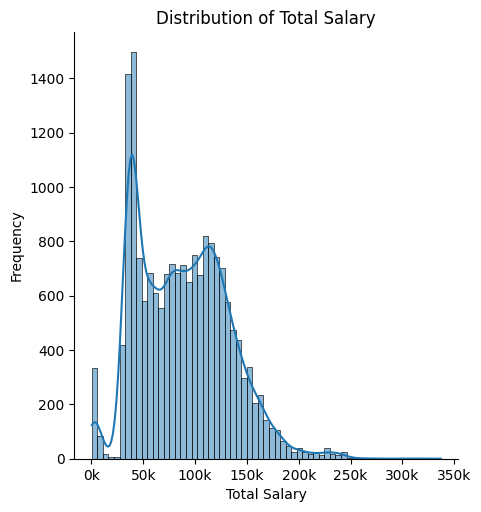

In [118]:
## Distribution of predictor variable - total salary
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

# Define the custom formatter
def k_formatter(x, pos):
    return f'{int(x/1000)}k'

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.displot(df_tech_cleaned['total_salary'], kde=True)

# Access the axes and apply the custom formatter
ax.fig.axes[0].xaxis.set_major_formatter(mticker.FuncFormatter(k_formatter))

# Set the labels and title
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Total Salary')

# Show the plot
plt.show()

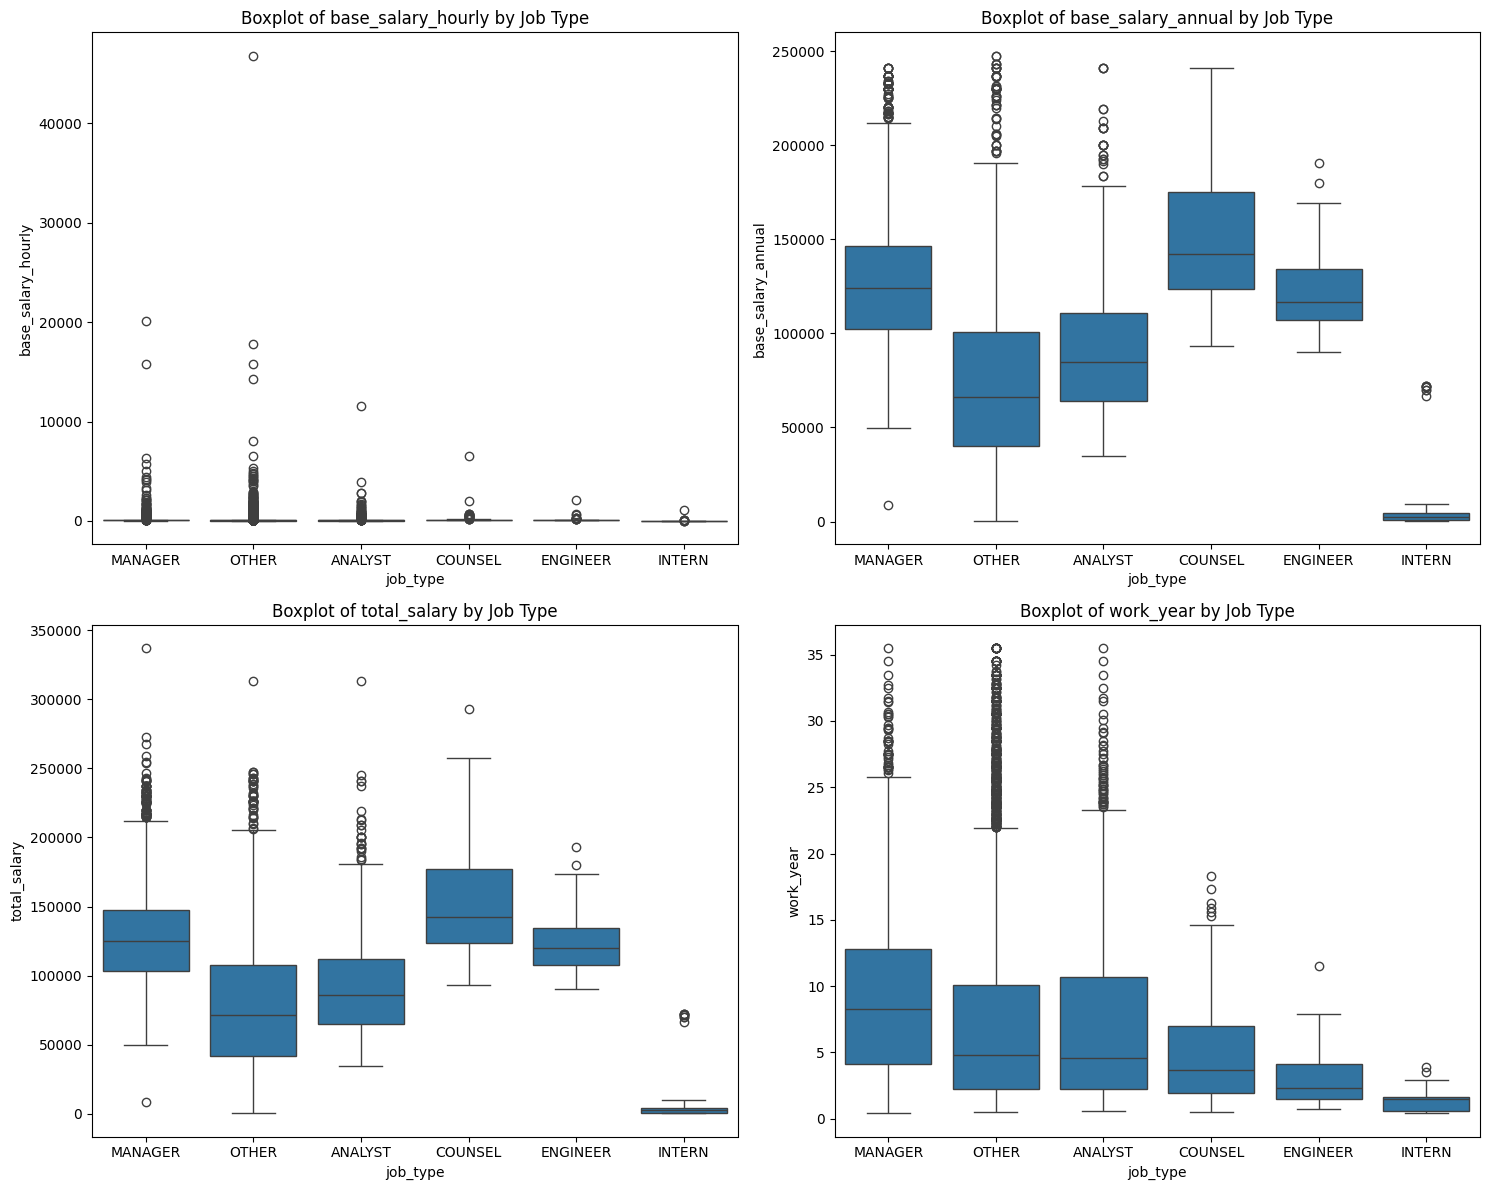

In [119]:
# Creating boxplots by job_type
import seaborn as sns
import matplotlib.pyplot as plt

# Variables to plot
variables = ['base_salary_hourly', 'base_salary_annual', 'total_salary', 'work_year']
n_vars = len(variables)

# Create a figure with subplots (3 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Iterate over variables and create boxplots
for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.boxplot(x='job_type', y=var, data=df_tech_cleaned, ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {var} by Job Type')

# Adjust layout and display plot
plt.tight_layout()
plt.show()


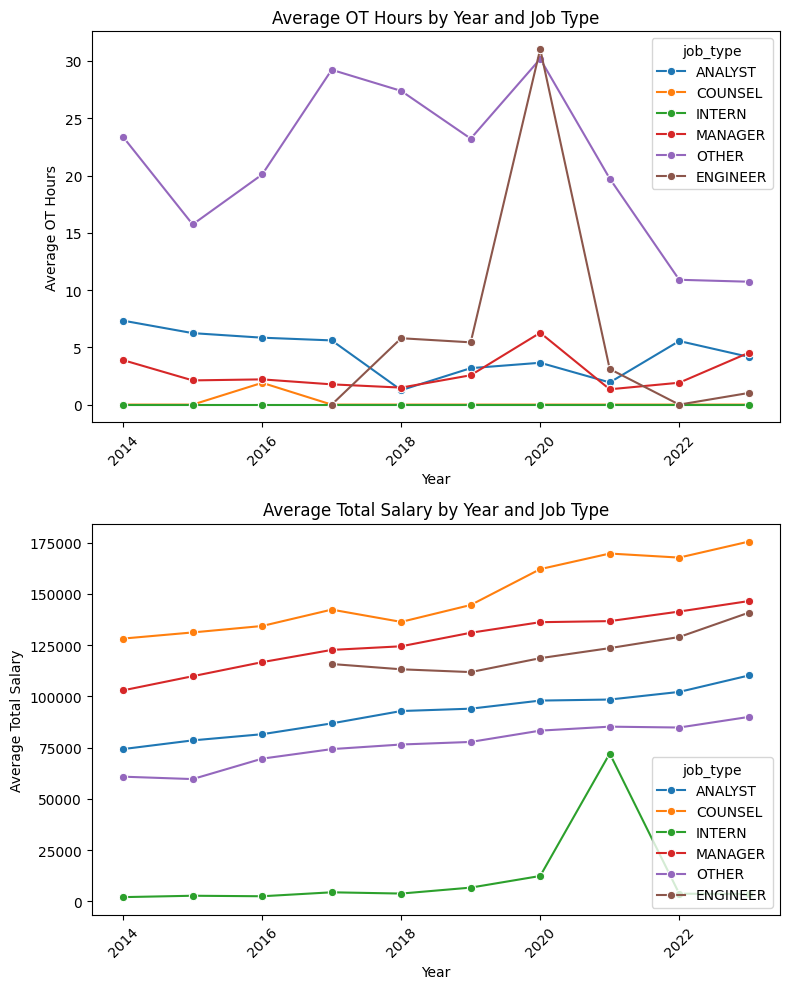

In [120]:
# Plot a time series of the average total salary and the average OT hours by fiscal year for different job_type categories

# Prepare the first grouped data for OT hours
grouped_ot_hours = df_tech_cleaned.groupby(['fiscal_year', 'job_type'])['ot_hours'].mean().reset_index()
grouped_ot_hours = grouped_ot_hours.rename(columns={'fiscal_year': 'Year'})

# Prepare the second grouped data for another metric, for example 'total_salary'
grouped_salary = df_tech_cleaned.groupby(['fiscal_year', 'job_type'])['total_salary'].mean().reset_index()
grouped_salary = grouped_salary.rename(columns={'fiscal_year': 'Year'})

# Create a figure and a 1x2 subplot grid (1 row, 2 columns)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

# Plot the first line chart for OT hours in the first subplot
sns.lineplot(data=grouped_ot_hours, x='Year', y='ot_hours', hue='job_type', marker='o', markersize=6, linestyle='-', ax=ax[0])
ax[0].set_title('Average OT Hours by Year and Job Type')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average OT Hours')
ax[0].tick_params(axis='x', rotation=45)

# Plot the second line chart for total salary in the second subplot
sns.lineplot(data=grouped_salary, x='Year', y='total_salary', hue='job_type', marker='o', markersize=6, linestyle='-', ax=ax[1])
ax[1].set_title('Average Total Salary by Year and Job Type')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Total Salary')
ax[1].tick_params(axis='x', rotation=45)

# Adjust the layout so that titles and labels do not overlap
plt.tight_layout()

# Show the plot
plt.show()

# Data Vizulization for top 10 agency subset after cleaning

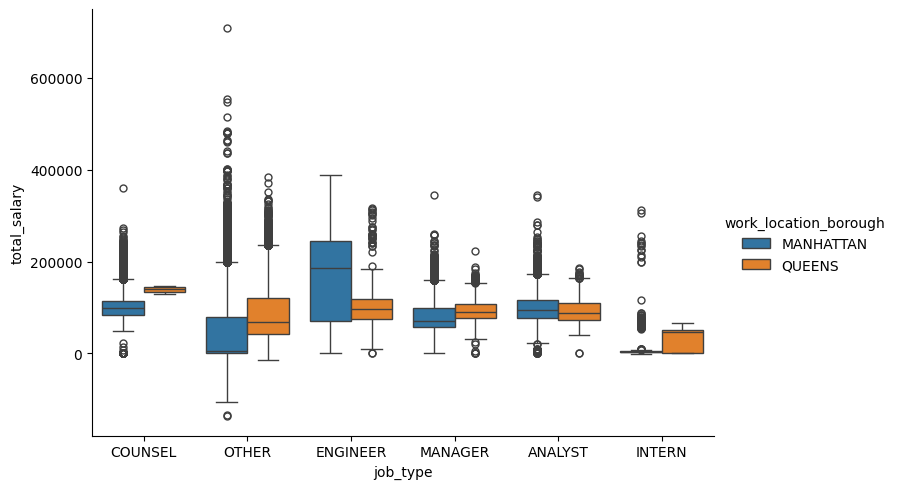

In [121]:
g=sbn.catplot(data=df_top10, x="job_type", y="total_salary", hue="work_location_borough", kind="box", aspect=1.5)

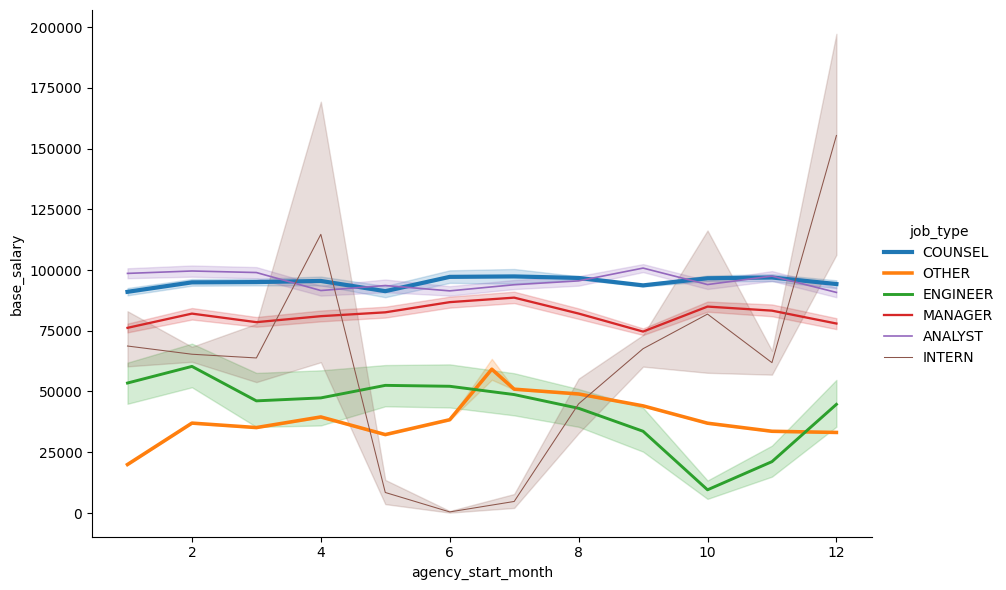

In [122]:
sbn.relplot(data=df_top10, x="agency_start_month", y="base_salary", kind="line",size="job_type", hue="job_type",
            height = 6, aspect=1.5)

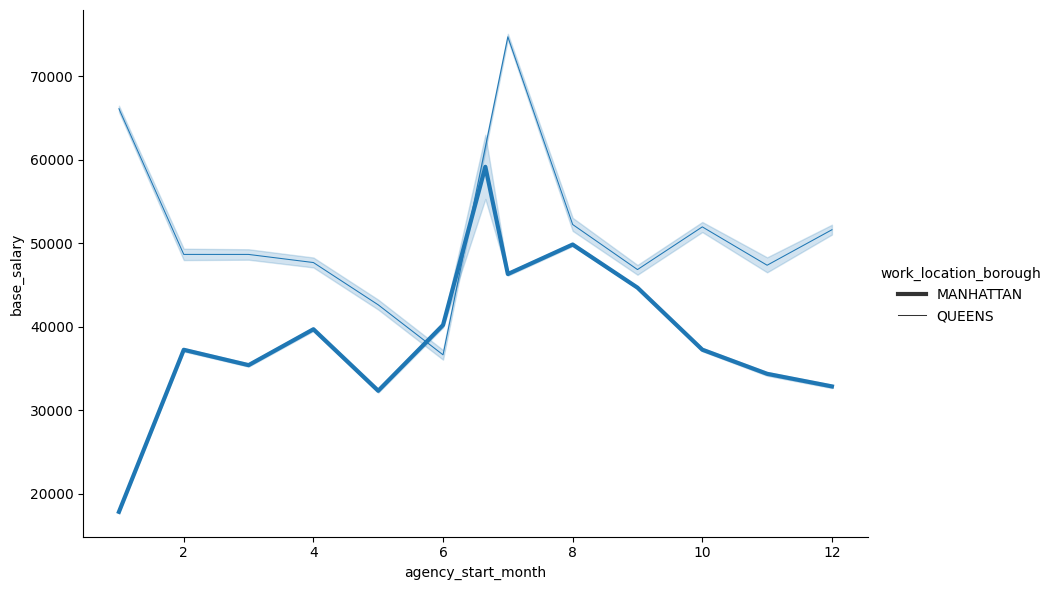

In [123]:
sbn.relplot(data=df_top10, x="agency_start_month", y="base_salary", kind="line",size="work_location_borough",
            height = 6, aspect=1.5)

In [124]:
median_salary = df_top10['total_salary'].median()
median_salary

27706.736800000002

## Model Building: Linear Regression

In [125]:
# Check the data types before building model
print(df_tech_cleaned.dtypes)

fiscal_year                            int64
payroll_number                       float64
agency_name                           object
last_name                             object
first_name                            object
mid_init                              object
agency_start_date             datetime64[ns]
work_location_borough                 object
title_description                     object
leave_status_as_of_june_30            object
base_salary                          float64
pay_basis                             object
regular_hours                        float64
regular_gross_paid                   float64
ot_hours                             float64
total_ot_paid                        float64
total_other_pay                      float64
base_salary_hourly                    object
base_salary_annual                    object
total_salary                          object
fiscal_year_end               datetime64[ns]
work_year                            float64
job_type  

In [128]:
work_location_counts = df_tech_cleaned['work_location_borough'].value_counts()
print(work_location_counts)

# Drop work location in 'BRONX' and 'WASHINGTON DC' for avoid model unbalanced
df_tech_cleaned = df_tech_cleaned[~df_tech_cleaned['work_location_borough'].isin(['BRONX', 'WASHINGTON DC'])]

work_location_borough
BROOKLYN     9509
MANHATTAN    8634
Name: count, dtype: int64


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Converting 'total_salary' to numeric since it is currently object
df_tech_cleaned['total_salary'] = pd.to_numeric(df_tech_cleaned['total_salary'], errors='coerce')

# Ensure 'fiscal_year' is treated as a categorical variable
df_tech_cleaned['fiscal_year'] = df_tech_cleaned['fiscal_year'].astype(str)

# Drop 

# One-hot encode the categorical variables
df_encoded = pd.get_dummies(df_tech_cleaned, columns=['fiscal_year', 'job_type', 'work_location_borough', 'pay_basis'], drop_first=True)
df_encoded = df_encoded.drop(columns=['fiscal_year_end'])

# Define the target variable (y) and predictors (X)
X = df_encoded[['regular_hours', 'ot_hours', 'work_year'] + 
               [col for col in df_encoded.columns if 'fiscal_year_' in col or 'work_location_borough_' in col or 'job_type_' in col or 'work_location_borough_' in col or 'pay_basis_' in col]]
y = df_encoded['total_salary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Map coefficients to their variable names
coefficients = pd.DataFrame(model.coef_, X_train.columns, columns=['Coefficient'])

# Display the coefficients
print(coefficients)

# Intercept
print("Intercept:", model.intercept_)

# Performance metrics
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error for train and test set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE for train and test set
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Train MSE:", mse_train)
print("Test MSE:", mse_test)
print("Train RMSE:", rmse_train)
print("Test RMSE:", rmse_test)
print("Train R^2:", r2_score(y_train, y_train_pred))
print("Test R^2:", r2_score(y_test, y_test_pred))

                                  Coefficient
regular_hours                        6.997572
ot_hours                            45.258653
work_year                          172.438109
fiscal_year_2015                   900.044581
fiscal_year_2016                  7642.205205
fiscal_year_2017                 12210.608865
fiscal_year_2018                 13807.783350
fiscal_year_2019                 18919.676180
fiscal_year_2020                 23979.044916
fiscal_year_2021                 24207.645697
fiscal_year_2022                 26219.253654
fiscal_year_2023                 30150.307224
job_type_COUNSEL                 60782.741649
job_type_ENGINEER                 9579.042314
job_type_INTERN                 -40744.238389
job_type_MANAGER                 25444.933941
job_type_OTHER                  -17174.665647
work_location_borough_MANHATTAN -29418.073728
pay_basis_per Hour              -46026.450199
Intercept: 80768.57308377179
Train MSE: 1003138557.0134289
Test MSE: 953143886.7

# Data Modeling: Logistic Regression

In [130]:
# Split total_salary to low and high salary category based on median
df_top10['salary_category'] = pd.cut(df_top10['total_salary'], bins=[float('-inf'), median_salary, float('inf')], labels=['Low','High'])
df_top10

,fiscal_year,payroll_number,agency_name,agency_start_date,work_location_borough,title_description,leave_status_as_of_june_30,base_salary,pay_basis,regular_hours,...,total_ot_paid,total_other_pay,agency_start_month,agency_start_day,agency_start_year,base_salary_hourly,base_salary_annual,total_salary,job_type,salary_category
2049,2022,742.0,DEPT OF ED PEDAGOGICAL,1988-09-06,MANHATTAN,GUIDANCE COUNSELOR,CEASED,128409.00,per Annum,0.00,...,0.00,8258.87,9.0,6.0,1988.0,inf,128409.0000,136667.8700,COUNSEL,High
2530,2022,742.0,DEPT OF ED PEDAGOGICAL,2015-10-20,MANHATTAN,TEACHER,ACTIVE,97469.00,per Annum,0.00,...,0.00,1486.01,10.0,20.0,2015.0,inf,97469.0000,98955.0100,OTHER,High
3162,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-09-05,MANHATTAN,PRINCIPAL,ACTIVE,169456.00,per Annum,0.00,...,0.00,16947.18,9.0,5.0,2000.0,inf,169456.0000,186403.1800,OTHER,High
3501,2022,742.0,DEPT OF ED PEDAGOGICAL,2000-10-18,MANHATTAN,TEACHER,CEASED,92906.00,per Annum,0.00,...,0.00,4426.47,10.0,18.0,2000.0,inf,92906.0000,97332.4700,OTHER,High
3611,2022,742.0,DEPT OF ED PEDAGOGICAL,2007-08-30,MANHATTAN,TEACHER,ACTIVE,100351.00,per Annum,0.00,...,0.00,4851.73,8.0,30.0,2007.0,inf,100351.0000,105202.7300,OTHER,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5633967,2023,846.0,DEPT OF PARKS & RECREATION,2018-11-05,MANHATTAN,AGENCY ATTORNEY,ACTIVE,95000.00,per Annum,1820.00,...,0.00,3762.50,11.0,5.0,2018.0,52.197802,95000.0000,98762.5000,OTHER,High
5633970,2023,846.0,DEPT OF PARKS & RECREATION,1998-07-13,QUEENS,PARK SUPERVISOR,ACTIVE,82835.00,per Annum,2080.00,...,25520.37,24728.30,7.0,13.0,1998.0,39.824519,82835.0000,133083.6700,OTHER,High
5633972,2023,846.0,DEPT OF PARKS & RECREATION,2016-05-19,QUEENS,LANDSCAPE ARCHITECT,ACTIVE,85194.00,per Annum,1680.00,...,0.00,5657.94,5.0,19.0,2016.0,50.710714,85194.0000,90851.9400,OTHER,High
5633973,2023,846.0,DEPT OF PARKS & RECREATION,2022-03-25,QUEENS,JOB TRAINING PARTICIPANT,CEASED,16.39,per Hour,1079.75,...,0.00,0.00,3.0,25.0,2022.0,16.390000,17697.1025,17697.1025,OTHER,Low


In [131]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer



from sklearn import metrics
#from sklearn.ensemble import GradientBoostingClassifier
#rom sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as smf
from sklearn import preprocessing
from sklearn import utils

In [132]:
#value mapping for agency names/Departments
mapping_dict = {'DEPT OF ED PEDAGOGICAL':1,'POLICE DEPARTMENT':2,
 'BOARD OF ELECTION POLL WORKERS':3,'FIRE DEPARTMENT':4,
 'DEPARTMENT OF EDUCATION ADMIN':5,'DEPT OF ED HRLY SUPPORT STAFF':6,
 'DEPT OF ED PER DIEM TEACHERS':7,'DEPT OF ED PER SESSION TEACHER':8,
 'DEPT OF ED PARA PROFESSIONALS':9,'DEPT OF PARKS & RECREATION':10}
df_top10['agency_name'] = df_top10['agency_name'].replace(mapping_dict)
#Value mapping for locations
work_location_borough={'QUEENS':2,'MANHATTAN':1}
df_top10['work_location_borough'] = df_top10['work_location_borough'].replace(work_location_borough)

# Value mapping for leave status
leave_status = {'CEASED':1,'ACTIVE':2,'ON LEAVE':3,'ON SEPARATION LEAVE':4,'SEASONAL':5}
df_top10['leave_status_as_of_june_30'] = df_top10['leave_status_as_of_june_30'].replace(leave_status)

In [133]:
X = df_top10[['fiscal_year','agency_name','work_location_borough','ot_hours',
        'regular_hours','agency_start_year','leave_status_as_of_june_30']]
y = df_top10[['salary_category']] 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [134]:
df_top10['total_salary'].isna().sum()

0

In [135]:
model = LogisticRegression(random_state=0).fit(X_train,y_train)
model.score(X_train,y_train)

c:\Users\shell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8394892649893436

In [136]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8394226677170202
Confusion Matrix:
 [[280536  50577]
 [ 55827 275694]]
Classification Report:
               precision    recall  f1-score   support

        High       0.83      0.85      0.84    331113
         Low       0.84      0.83      0.84    331521

    accuracy                           0.84    662634
   macro avg       0.84      0.84      0.84    662634
weighted avg       0.84      0.84      0.84    662634

